<a href="https://colab.research.google.com/github/david6070/py/blob/master/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cleaned Up the DATA for *Analysis*

In [58]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import datetime as dt

# Load holdings file
holdings_df = pd.read_excel("holdings-daily-us-en-xlre.xlsx", skiprows=4)
holdings_df = holdings_df[['Name', 'Ticker', 'Weight']].dropna(subset=['Ticker']).head(30)

# Get tickers
tickers = holdings_df['Ticker'].tolist()

# Define time period (past 6 months)
end_date = dt.date.today()
start_date = end_date - dt.timedelta(days=180)

# Fetch data
# Setting auto_adjust=False explicitly to avoid FutureWarning and ensure MultiIndex
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

# Print column names to understand the MultiIndex structure
print(data.columns)

# Extract 'Adj Close' using .xs() with the level index (0 for the first level)
adj_close_data = data.xs('Adj Close', level=0, axis=1)

# Explicitly set column names to tickers
adj_close_data.columns = tickers

# Save cleaned data
adj_close_data.to_excel("XLRE_cleaned_for_analysis.xlsx")
print("✅ Saved cleaned file:", "XLRE_cleaned_for_analysis.xlsx")

[*********************100%***********************]  30 of 30 completed


MultiIndex([('Adj Close',  'AMT'),
            ('Adj Close',  'ARE'),
            ('Adj Close',  'AVB'),
            ('Adj Close',  'BXP'),
            ('Adj Close', 'CBRE'),
            ('Adj Close',  'CCI'),
            ('Adj Close',  'CPT'),
            ('Adj Close', 'CSGP'),
            ('Adj Close',  'DLR'),
            ('Adj Close',  'DOC'),
            ...
            (   'Volume',  'PLD'),
            (   'Volume',  'PSA'),
            (   'Volume',  'REG'),
            (   'Volume', 'SBAC'),
            (   'Volume',  'SPG'),
            (   'Volume',  'UDR'),
            (   'Volume', 'VICI'),
            (   'Volume',  'VTR'),
            (   'Volume', 'WELL'),
            (   'Volume',   'WY')],
           names=['Price', 'Ticker'], length=180)
✅ Saved cleaned file: XLRE_cleaned_for_analysis.xlsx


# Display the first 30 rows of the adj_close_data DataFrame

In [59]:
# Display the first 30 rows of the adj_close_data DataFrame
display(adj_close_data.head(30))

,WELL,PLD,AMT,EQIX,SPG,DLR,PSA,O,CBRE,CCI,...,INVH,MAA,KIM,DOC,ARE,REG,BXP,CPT,UDR,HST
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-10,203.215164,72.083405,190.197098,58.261532,116.650002,93.099586,106.007553,75.419998,140.313004,17.559977,...,93.162025,272.465546,67.093613,210.136444,144.059799,38.993832,29.267359,64.647675,140.534363,25.404512
2025-04-11,209.706390,74.355042,189.617447,59.218559,115.949997,94.576889,105.880020,77.389999,143.074097,17.550314,...,94.477631,274.689789,68.054611,217.048553,144.557251,39.043304,30.211153,65.150284,141.386627,25.384832
2025-04-14,214.201080,77.042343,197.398636,61.366993,119.010002,97.678246,109.068298,79.529999,144.277161,18.081848,...,96.509933,282.910706,69.045036,222.544586,146.186203,40.359261,30.736565,66.421555,144.280350,25.699684
2025-04-15,214.417450,76.481682,196.985992,62.099411,118.680000,98.333748,109.225250,80.510002,144.198273,18.139833,...,96.686653,283.087067,68.996010,222.683228,145.698486,40.636303,31.184137,66.796028,145.271362,25.434031
2025-04-16,214.407623,74.548378,196.553711,61.591599,117.209999,99.057724,108.106903,79.019997,146.121170,17.956215,...,98.463692,283.204620,68.848915,223.475464,144.410950,40.438416,31.184137,66.648209,144.320007,25.178213
2025-04-17,218.990829,75.244362,199.815521,62.382614,117.620003,101.347054,110.147400,79.699997,148.655472,18.220533,...,100.240723,290.043976,70.270805,226.832474,146.703171,40.853981,31.660900,66.943855,145.945236,25.394672
2025-04-21,214.397797,73.204727,198.253372,61.103321,115.559998,99.918671,108.705322,77.809998,144.306732,17.929007,...,96.833916,281.764282,69.407860,223.356628,143.581833,40.309792,31.281437,65.840111,142.357788,24.292698
2025-04-22,217.328674,73.717056,202.821884,62.431442,118.190002,102.110176,111.010689,80.870003,146.821304,18.278837,...,98.129875,290.690674,70.918007,229.169540,147.005569,41.101341,32.079285,67.298637,145.925415,24.853525
2025-04-23,209.096619,74.403381,202.802231,63.759563,122.050003,100.065414,111.864166,81.830002,149.483795,18.288555,...,99.632027,289.279694,70.564987,221.722656,149.512390,41.358593,31.836039,67.643547,146.321823,24.902718


#Compute daily returns

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the data
# Corrected header to 0 to read ticker symbols as column names
df = pd.read_excel('XLRE_cleaned_for_analysis.xlsx', sheet_name='Sheet1', header=0, index_col=0)

# Display basic information about the data
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# Task 4c: Compute daily returns
returns = df.pct_change().dropna()
print(f"\nReturns data shape: {returns.shape}")
print(f"Date range: {returns.index[0]} to {returns.index[-1]}")
print(f"Number of trading days: {len(returns)}")


Dataset Shape: (123, 30)

First few rows:
                  WELL        PLD         AMT       EQIX         SPG  \
Date                                                                   
2025-04-10  203.215164  72.083405  190.197098  58.261532  116.650002   
2025-04-11  209.706390  74.355042  189.617447  59.218559  115.949997   
2025-04-14  214.201080  77.042343  197.398636  61.366993  119.010002   
2025-04-15  214.417450  76.481682  196.985992  62.099411  118.680000   
2025-04-16  214.407623  74.548378  196.553711  61.591599  117.209999   

                  DLR         PSA          O        CBRE        CCI  ...  \
Date                                                                 ...   
2025-04-10  93.099586  106.007553  75.419998  140.313004  17.559977  ...   
2025-04-11  94.576889  105.880020  77.389999  143.074097  17.550314  ...   
2025-04-14  97.678246  109.068298  79.529999  144.277161  18.081848  ...   
2025-04-15  98.333748  109.225250  80.510002  144.198273  18.139833  ... 

#

#Compute PCA

In [77]:
# Task 4d: Compute covariance matrix
cov_matrix = returns.cov()
print(f"\nCovariance matrix shape: {cov_matrix.shape}")

# Task 4e: Compute PCA
# Standardize the returns first
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(returns_scaled)

# Get explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\nPCA Results:")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative explained variance: {cumulative_variance}")




Covariance matrix shape: (30, 30)

PCA Results:
Explained variance ratio: [0.48335974 0.10765762 0.05765635 0.05509149 0.04746892 0.03064782
 0.02442331 0.02176311 0.01967044 0.01806481 0.01557787 0.01377009
 0.01303927 0.01231519 0.01125096 0.0099166  0.0085995  0.00837984
 0.00700646 0.00574384 0.00522983 0.00425385 0.0039296  0.00347575
 0.00299715 0.00228795 0.00214902 0.0019039  0.00126775 0.00110196]
Cumulative explained variance: [0.48335974 0.59101736 0.64867371 0.7037652  0.75123412 0.78188195
 0.80630526 0.82806837 0.84773881 0.86580362 0.88138149 0.89515158
 0.90819085 0.92050604 0.931757   0.9416736  0.9502731  0.95865294
 0.96565939 0.97140324 0.97663307 0.98088692 0.98481652 0.98829227
 0.99128941 0.99357737 0.99572639 0.99763029 0.99889804 1.        ]


# Task 4f: Compute SVD


SVD Results:
Singular values: [42.06063072 19.85011051 14.52660409 14.1998193  13.18090483 10.59108256
  9.45459269  8.92485172  8.48491719  8.13124909  7.55082775  7.0991923
  6.90823578  6.71368663  6.4170485   6.02451331  5.61018434  5.53806962
  5.06395363  4.58502639  4.37506405  3.94577045  3.79240388  3.56668453
  3.31203232  2.89377168  2.80453298  2.63975077  2.15405605  2.00827834]
U shape: (122, 30), S shape: (30,), Vt shape: (30, 30)


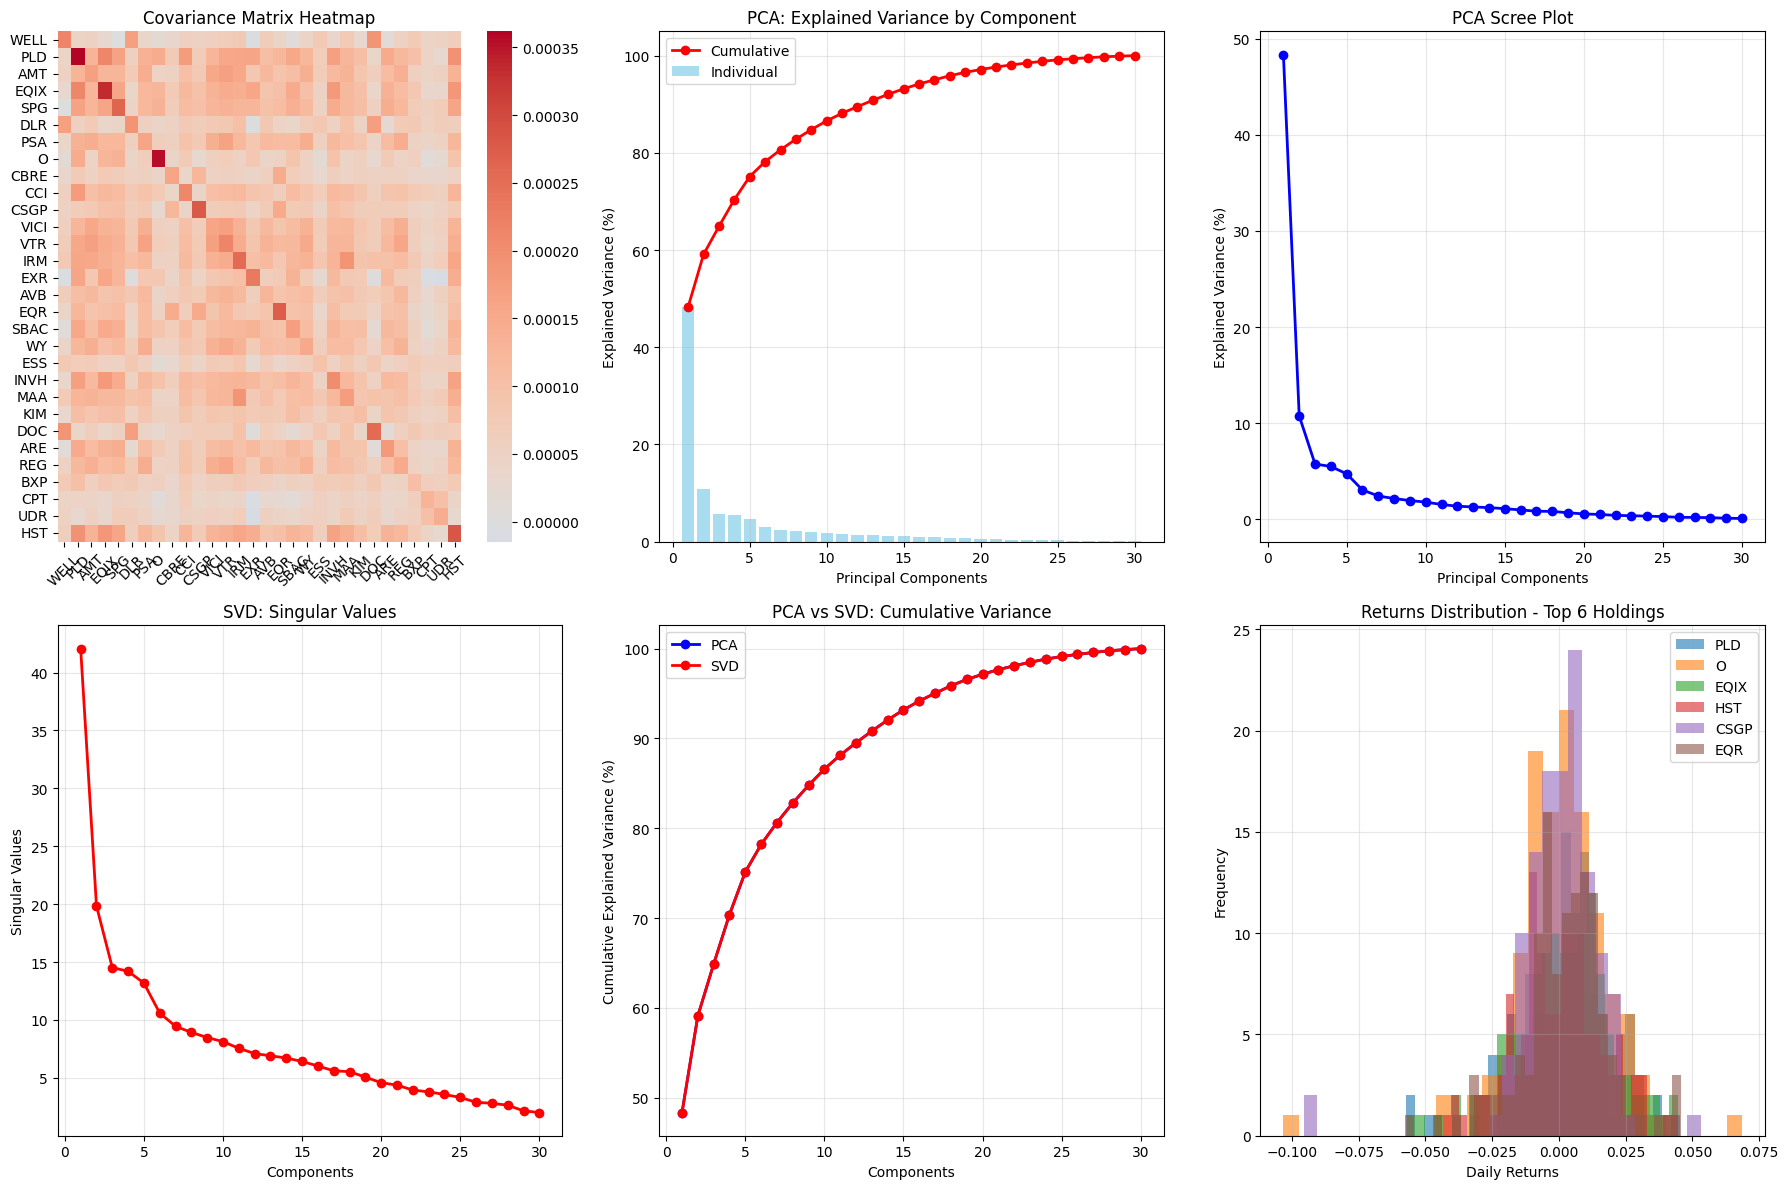


DETAILED ANALYSIS RESULTS

1. DATA OVERVIEW:
   - Number of holdings: 30
   - Time period: 122 trading days
   - Date range: 2025-04-11 to 2025-10-06

2. COVARIANCE MATRIX SUMMARY:
   - Average covariance: 0.000088
   - Minimum covariance: -0.000015
   - Maximum covariance: 0.000362

3. PCA RESULTS (Top 10 Components):
   Component  Explained Variance  Cumulative Variance
   -------------------------------------------------
    1          48.34%                48.34%
    2          10.77%                59.10%
    3           5.77%                64.87%
    4           5.51%                70.38%
    5           4.75%                75.12%
    6           3.06%                78.19%
    7           2.44%                80.63%
    8           2.18%                82.81%
    9           1.97%                84.77%
   10           1.81%                86.58%

4. SVD RESULTS:
   - Number of singular values: 30
   - Largest singular value: 42.0606
   - Smallest singular value: 2.0083
   - 

In [61]:
# SVD on the covariance matrix
U, S, Vt = np.linalg.svd(returns_scaled, full_matrices=False)

print(f"\nSVD Results:")
print(f"Singular values: {S}")
print(f"U shape: {U.shape}, S shape: {S.shape}, Vt shape: {Vt.shape}")

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Heatmap of covariance matrix
sns.heatmap(cov_matrix, ax=axes[0,0], cmap='coolwarm', center=0,
            xticklabels=[ticker[:4] for ticker in cov_matrix.columns],
            yticklabels=[ticker[:4] for ticker in cov_matrix.index])
axes[0,0].set_title('Covariance Matrix Heatmap')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Explained variance plot for PCA
components = range(1, len(explained_variance) + 1)
axes[0,1].bar(components, explained_variance * 100, alpha=0.7, color='skyblue')
axes[0,1].plot(components, cumulative_variance * 100, marker='o', color='red', linewidth=2)
axes[0,1].set_xlabel('Principal Components')
axes[0,1].set_ylabel('Explained Variance (%)')
axes[0,1].set_title('PCA: Explained Variance by Component')
axes[0,1].legend(['Cumulative', 'Individual'], loc='best')
axes[0,1].grid(True, alpha=0.3)

# 3. Scree plot for PCA
axes[0,2].plot(components, explained_variance * 100, 'bo-', linewidth=2)
axes[0,2].set_xlabel('Principal Components')
axes[0,2].set_ylabel('Explained Variance (%)')
axes[0,2].set_title('PCA Scree Plot')
axes[0,2].grid(True, alpha=0.3)

# 4. Singular values from SVD
axes[1,0].plot(range(1, len(S) + 1), S, 'ro-', linewidth=2)
axes[1,0].set_xlabel('Components')
axes[1,0].set_ylabel('Singular Values')
axes[1,0].set_title('SVD: Singular Values')
axes[1,0].grid(True, alpha=0.3)

# 5. Cumulative explained variance comparison
pca_cumulative = np.cumsum(explained_variance)
svd_variance_explained = (S ** 2) / np.sum(S ** 2)
svd_cumulative = np.cumsum(svd_variance_explained)

axes[1,1].plot(components, pca_cumulative * 100, 'bo-', linewidth=2, label='PCA')
axes[1,1].plot(components, svd_cumulative * 100, 'ro-', linewidth=2, label='SVD')
axes[1,1].set_xlabel('Components')
axes[1,1].set_ylabel('Cumulative Explained Variance (%)')
axes[1,1].set_title('PCA vs SVD: Cumulative Variance')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Returns distribution for top 6 holdings
top_6_tickers = returns.std().nlargest(6).index
for i, ticker in enumerate(top_6_tickers[:6]):
    axes[1,2].hist(returns[ticker].dropna(), bins=30, alpha=0.6, label=ticker)
axes[1,2].set_xlabel('Daily Returns')
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('Returns Distribution - Top 6 Holdings')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed results
print("\n" + "="*80)
print("DETAILED ANALYSIS RESULTS")
print("="*80)

print(f"\n1. DATA OVERVIEW:")
print(f"   - Number of holdings: {len(df.columns)}")
print(f"   - Time period: {len(returns)} trading days")
print(f"   - Date range: {returns.index[0].strftime('%Y-%m-%d')} to {returns.index[-1].strftime('%Y-%m-%d')}")

print(f"\n2. COVARIANCE MATRIX SUMMARY:")
print(f"   - Average covariance: {cov_matrix.values.mean():.6f}")
print(f"   - Minimum covariance: {cov_matrix.values.min():.6f}")
print(f"   - Maximum covariance: {cov_matrix.values.max():.6f}")

print(f"\n3. PCA RESULTS (Top 10 Components):")
print("   Component  Explained Variance  Cumulative Variance")
print("   -------------------------------------------------")
for i, (exp_var, cum_var) in enumerate(zip(explained_variance[:10], cumulative_variance[:10])):
    print(f"   {i+1:2d}         {exp_var*100:6.2f}%               {cum_var*100:6.2f}%")

print(f"\n4. SVD RESULTS:")
print(f"   - Number of singular values: {len(S)}")
print(f"   - Largest singular value: {S[0]:.4f}")
print(f"   - Smallest singular value: {S[-1]:.4f}")
print(f"   - Condition number: {S[0]/S[-1]:.2f}")

print(f"\n5. KEY FINDINGS:")
print(f"   - First 5 components explain {cumulative_variance[4]*100:.1f}% of total variance")
print(f"   - First 10 components explain {cumulative_variance[9]*100:.1f}% of total variance")
print(f"   - Dimensionality reduction potential: High (few components capture most variance)")

# Additional analysis: Correlation with market factors
print(f"\n6. VOLATILITY ANALYSIS (Top 10 Most Volatile Holdings):")
volatility = returns.std().sort_values(ascending=False)
print(volatility.head(10))

# Save results to files
results_summary = {
    'returns_data': returns,
    'covariance_matrix': cov_matrix,
    'pca_explained_variance': explained_variance,
    'pca_cumulative_variance': cumulative_variance,
    'svd_singular_values': S,
    'pca_components': pca_components,
    'volatility_ranking': volatility
}

print(f"\nAnalysis completed successfully!")

# Define major_holdings based on the tickers list



In [62]:

major_holdings = tickers

print(f"\nHoldings verification:")
print(f"Number of holdings selected: {len(major_holdings)}")
print(f"First 10 tickers: {major_holdings[:10]}")
if len(major_holdings) < 30:
    print(f"Warning: Only {len(major_holdings)} holdings available (less than 30)")
elif len(major_holdings) > 30:
    print(f"Info: {len(major_holdings)} holdings available (more than 30, using top 30)")

unique_holdings = list(dict.fromkeys(major_holdings))
if len(unique_holdings) != len(major_holdings):
    print(f"Removed {len(major_holdings) - len(unique_holdings)} duplicate tickers")
    major_holdings = unique_holdings


Holdings verification:
Number of holdings selected: 30
First 10 tickers: ['WELL', 'PLD', 'AMT', 'EQIX', 'SPG', 'DLR', 'PSA', 'O', 'CBRE', 'CCI']


#30 largest holdings.

In [63]:
def process_holdings_data(df):
    """
    Process the holdings DataFrame to extract top 30 holdings
    """
    df.columns = df.columns.str.strip().str.lower()
    ticker_col = None
    weight_col = None
    company_col = None

    for col in df.columns:
        if 'ticker' in col or 'symbol' in col:
            ticker_col = col
        elif 'weight' in col or 'percent' in col or '%' in col:
            weight_col = col
        elif 'name' in col or 'company' in col or 'security' in col:
            company_col = col

    print(f"Identified columns:")
    print(f"  Ticker: {ticker_col}")
    print(f"  Weight: {weight_col}")
    print(f"  Company: {company_col}")

    if ticker_col and weight_col:
        df_clean = df[[ticker_col, weight_col]].copy()
        if company_col:
            df_clean['company'] = df[company_col]
        else:
            df_clean['company'] = 'N/A'

        df_clean = df_clean.dropna()
        if df_clean[weight_col].dtype == 'object':
            df_clean[weight_col] = df_clean[weight_col].str.replace('%', '').astype(float)

        df_clean = df_clean.sort_values(weight_col, ascending=False)
        top_30 = df_clean.head(30)

        return top_30
    else:
        print("Could not identify required columns")
        return None

if 'holdings_df' in locals():
    top_30_holdings = process_holdings_data(holdings_df)

    if top_30_holdings is not None:
        print(f"\nTop 30 Holdings from Official SSGA Data:")
        print("=" * 70)
        print(f"{'Rank':<4} {'Ticker':<8} {'Weight (%)':<12} {'Company Name'}")
        print("-" * 70)

        for i, (_, row) in enumerate(top_30_holdings.iterrows(), 1):
            ticker = row.iloc[0]
            weight = row.iloc[1]
            company = row.get('company', 'N/A') if 'company' in row else 'N/A'
            print(f"{i:<4} {ticker:<8} {weight:<12.2f} {company}")

        major_holdings = top_30_holdings.iloc[:, 0].tolist()

        print(f"\nTotal holdings selected: {len(major_holdings)}")
        print(f"Ticker symbols: {', '.join(major_holdings[:10])}...")

    else:
        print("Failed to process holdings data. Please check the Excel file format.")
        print("Required columns: ticker/symbol and weight/percent")
else:
    print("Holdings data not available. Please ensure the Excel file is loaded correctly.")


Identified columns:
  Ticker: ticker
  Weight: weight
  Company: name

Top 30 Holdings from Official SSGA Data:
Rank Ticker   Weight (%)   Company Name
----------------------------------------------------------------------
1    WELL     9.45         WELLTOWER INC
2    PLD      8.77         PROLOGIS INC
3    AMT      7.19         AMERICAN TOWER CORP
4    EQIX     6.15         EQUINIX INC
5    SPG      4.88         SIMON PROPERTY GROUP INC
6    DLR      4.56         DIGITAL REALTY TRUST INC
7    PSA      4.52         PUBLIC STORAGE
8    O        4.52         REALTY INCOME CORP
9    CBRE     4.27         CBRE GROUP INC   A
10   CCI      4.20         CROWN CASTLE INC
11   CSGP     3.63         COSTAR GROUP INC
12   VICI     3.52         VICI PROPERTIES INC
13   VTR      3.20         VENTAS INC
14   IRM      3.13         IRON MOUNTAIN INC
15   EXR      3.06         EXTRA SPACE STORAGE INC
16   AVB      2.74         AVALONBAY COMMUNITIES INC
17   EQR      2.22         EQUITY RESIDENTIAL
18  

In [64]:
!pip install yahooquery
from yahooquery import Ticker
import os
from datetime import datetime, timedelta
import pandas as pd

end_date = datetime.now()
start_date = end_date - timedelta(days=180)

cache_file = 'XLRE_cleaned_for_analysis.xlsx'
if os.path.exists(cache_file):
    print(f"Found cached data: {cache_file}")
    # Corrected to use pd.read_excel for the cached file
    data = pd.read_excel(cache_file, index_col=0)
    print(f"Loaded cached data: {data.shape}")
else:
    print(f"Data collection period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
    print(f"Downloading {len(major_holdings)} tickers...")

    tickers = Ticker(major_holdings)
    print("Fetching historical data...")
    hist_data = tickers.history(start=start_date.strftime('%Y-%m-%d'),
                                  end=end_date.strftime('%Y-%m-%d'))

    print(f"✓ Data received, shape: {hist_data.shape}")

    hist_data = hist_data.reset_index()
    print(f"Columns: {list(hist_data.columns)}...")
    price_cols = ['open', 'high', 'low', 'close', 'volume', 'adjclose']

    data_frames = []
    for col in price_cols:
        if col in hist_data.columns:
            df_col = hist_data.pivot(index='date', columns='symbol', values=col)
            data_frames.append(df_col)

    data = pd.concat(data_frames, axis=1, keys=price_cols)
    data = data.swaplevel(axis=1)
    data = data.sort_index(axis=1, level=0)
    data.columns.names = ['Ticker', 'Price Type']

    data = data.rename(columns={'adjclose': 'Adj Close',
                                 'open': 'Open',
                                 'high': 'High',
                                 'low': 'Low',
                                 'close': 'Close',
                                 'volume': 'Volume'}, level='Price Type')

    # The cache file is intended to be an Excel file, so save as Excel
    data.to_excel(cache_file)
    print(f"\n✓ Downloaded and saved to {cache_file}")
    print(f"Data shape: {data.shape}")
    print(f"Date range: {data.index[0].strftime('%Y-%m-%d')} to {data.index[-1].strftime('%Y-%m-%d')}")

    available_tickers = data.columns.get_level_values('Ticker').unique()
    print(f"Successfully downloaded {len(available_tickers)}/{len(major_holdings)} tickers")

Found cached data: XLRE_cleaned_for_analysis.xlsx
Loaded cached data: (123, 30)


#DATA STRUCTURE ANALYSIS

In [65]:
import pandas as pd
import numpy as np

# Assuming your data is already loaded as 'data'
# Let's first examine the actual structure of your data
print("Data structure analysis:")
print("=" * 50)

print(f"Data shape: {data.shape}")
print(f"Column names: {list(data.columns)}")
print(f"Index type: {type(data.index)}")
print(f"Index name: {data.index.name}")

# Display the first few rows to understand the structure
print("\nFirst few rows of data:")
print(data.head())

print(f"\nColumn data types:")
print(data.dtypes.head())

# Based on your file content, it appears you have a simpler structure
# Let's check if we have the expected columns
print(f"\nAvailable columns: {list(data.columns)}")

# Check if we have price data (looking for 'Adj Close' or similar)
if 'Adj Close' in data.columns or 'Price' in data.columns:
    # Determine which column contains the price data
    if 'Adj Close' in data.columns:
        price_column = 'Adj Close'
    else:
        price_column = 'Price'

    print(f"\nUsing '{price_column}' as price data")

    # Extract prices (all columns except Date and potential metadata)
    # The first column is likely Date, so we'll use all others as tickers
    price_data = data.iloc[:, 1:]  # Assuming first column is date, rest are prices

    print(f"Price data shape: {price_data.shape}")
    print(f"Available tickers: {list(price_data.columns)}")

    # Set date as index if it's not already
    if data.iloc[:, 0].dtype == 'object' or hasattr(data.iloc[:, 0], 'dt'):
        dates = data.iloc[:, 0]
        price_data.index = pd.to_datetime(dates)
        print(f"Date range: {price_data.index[0]} to {price_data.index[-1]}")

    # Calculate daily returns
    daily_returns = price_data.pct_change().dropna()

    print(f"\nDaily returns shape: {daily_returns.shape}")
    print(f"Number of trading days: {len(daily_returns)}")

    print("\nDaily Returns Summary Statistics:")
    print("=" * 60)
    summary_stats = daily_returns.describe()
    print(summary_stats.round(6))

    # Additional analysis
    print("\nAdditional Analysis:")
    print("=" * 40)
    print(f"Total number of securities: {daily_returns.shape[1]}")
    print(f"Average daily return across all securities: {daily_returns.mean().mean():.6f}")
    print(f"Average volatility (std dev): {daily_returns.std().mean():.6f}")

    # Top 5 most volatile securities
    volatility_ranking = daily_returns.std().sort_values(ascending=False)
    print(f"\nTop 5 most volatile securities:")
    for i, (ticker, vol) in enumerate(volatility_ranking.head().items()):
        print(f"  {i+1}. {ticker}: {vol:.6f}")

    # Correlation analysis
    correlation_matrix = daily_returns.corr()
    print(f"\nCorrelation matrix shape: {correlation_matrix.shape}")
    print(f"Average correlation: {correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)].mean():.6f}")

else:
    print("Error: Price data not found in expected format")
    print("Available columns:", list(data.columns))

    # Alternative approach - check if data is already in the right format
    print("\nTrying alternative approach...")

    # Check if first row contains tickers and second row might be metadata
    if 'Ticker' in data.iloc[0].values:
        print("Data appears to have tickers in first row")
        # Reorganize the data
        new_columns = data.iloc[0].values
        data_clean = data.iloc[2:]  # Skip header rows
        data_clean.columns = new_columns
        data_clean = data_clean.set_index(data_clean.columns[0])
        data_clean.index = pd.to_datetime(data_clean.index)
        data_clean = data_clean.astype(float)

        print(f"Cleaned data shape: {data_clean.shape}")
        print(f"Available tickers: {list(data_clean.columns)}")

        # Calculate returns
        daily_returns = data_clean.pct_change().dropna()
        print(f"\nDaily returns shape: {daily_returns.shape}")

        print("\nDaily Returns Summary Statistics:")
        print("=" * 60)
        summary_stats = daily_returns.describe()
        print(summary_stats.round(6))

Data structure analysis:
Data shape: (123, 30)
Column names: ['WELL', 'PLD', 'AMT', 'EQIX', 'SPG', 'DLR', 'PSA', 'O', 'CBRE', 'CCI', 'CSGP', 'VICI', 'VTR', 'IRM', 'EXR', 'AVB', 'EQR', 'SBAC', 'WY', 'ESS', 'INVH', 'MAA', 'KIM', 'DOC', 'ARE', 'REG', 'BXP', 'CPT', 'UDR', 'HST']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index name: Date

First few rows of data:
                  WELL        PLD         AMT       EQIX         SPG  \
Date                                                                   
2025-04-10  203.215164  72.083405  190.197098  58.261532  116.650002   
2025-04-11  209.706390  74.355042  189.617447  59.218559  115.949997   
2025-04-14  214.201080  77.042343  197.398636  61.366993  119.010002   
2025-04-15  214.417450  76.481682  196.985992  62.099411  118.680000   
2025-04-16  214.407623  74.548378  196.553711  61.591599  117.209999   

                  DLR         PSA          O        CBRE        CCI  ...  \
Date                               

#statistics for daily returns

In [66]:
import pandas as pd

# Load the cleaned Adjusted Close data from the Excel file
try:
    adj_close_prices = pd.read_excel('XLRE_cleaned_for_analysis.xlsx', index_col=0)

    # Compute daily returns
    daily_returns = adj_close_prices.pct_change().dropna()

    # Display the first few rows of the daily returns
    print("\nDaily Returns (First 5 rows):")
    print(daily_returns.head())

    # Display summary statistics for daily returns
    print("\nDaily Returns Summary Statistics:")
    print("=" * 50)
    print(daily_returns.describe())

except FileNotFoundError:
    print("Error: 'XLRE_cleaned_for_analysis.xlsx' not found.")
    print("Please ensure cell lyY_uRgAhnym was run successfully to create this file.")
except Exception as e:
    print(f"An error occurred: {e}")


Daily Returns (First 5 rows):
                WELL       PLD       AMT      EQIX       SPG       DLR  \
Date                                                                     
2025-04-11  0.031943  0.031514 -0.003048  0.016426 -0.006001  0.015868   
2025-04-14  0.021433  0.036141  0.041036  0.036280  0.026391  0.032792   
2025-04-15  0.001010 -0.007277 -0.002090  0.011935 -0.002773  0.006711   
2025-04-16 -0.000046 -0.025278 -0.002194 -0.008177 -0.012386  0.007362   
2025-04-17  0.021376  0.009336  0.016595  0.012843  0.003498  0.023111   

                 PSA         O      CBRE       CCI  ...      INVH       MAA  \
Date                                                ...                       
2025-04-11 -0.001203  0.026120  0.019678 -0.000550  ...  0.014122  0.008163   
2025-04-14  0.030112  0.027652  0.008409  0.030286  ...  0.021511  0.029928   
2025-04-15  0.001439  0.012322 -0.000547  0.003207  ...  0.001831  0.000623   
2025-04-16 -0.010239 -0.018507  0.013335 -0.010122  ...

#MISSING DATA

In [67]:
print("Missing values in daily returns:")
print("=" * 40)
missing_values = daily_returns.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(f"Total missing values: {missing_values.sum()}")
    daily_returns = daily_returns.fillna(method='ffill').fillna(method='bfill')
    print("Missing values filled using forward and backward fill")


Missing values in daily returns:
Series([], dtype: int64)
No missing values found!


#Covariance and Correlation Matrix

In [68]:
cov_matrix = daily_returns.cov()

print(f"Covariance matrix shape: {cov_matrix.shape}")
print(f"\nCovariance matrix (first 5x5):")
print(cov_matrix.iloc[:5, :5].round(6))

corr_matrix = daily_returns.corr()

print(f"\nCorrelation matrix (first 5x5):")
print(corr_matrix.iloc[:5, :5].round(4))


Covariance matrix shape: (30, 30)

Covariance matrix (first 5x5):
          WELL       PLD       AMT      EQIX       SPG
WELL  0.000216  0.000044  0.000053  0.000032 -0.000000
PLD   0.000044  0.000362  0.000128  0.000213  0.000164
AMT   0.000053  0.000128  0.000168  0.000126  0.000126
EQIX  0.000032  0.000213  0.000126  0.000335  0.000160
SPG  -0.000000  0.000164  0.000126  0.000160  0.000265

Correlation matrix (first 5x5):
        WELL     PLD     AMT    EQIX     SPG
WELL  1.0000  0.1568  0.2785  0.1175 -0.0018
PLD   0.1568  1.0000  0.5206  0.6109  0.5298
AMT   0.2785  0.5206  1.0000  0.5290  0.5960
EQIX  0.1175  0.6109  0.5290  1.0000  0.5385
SPG  -0.0018  0.5298  0.5960  0.5385  1.0000


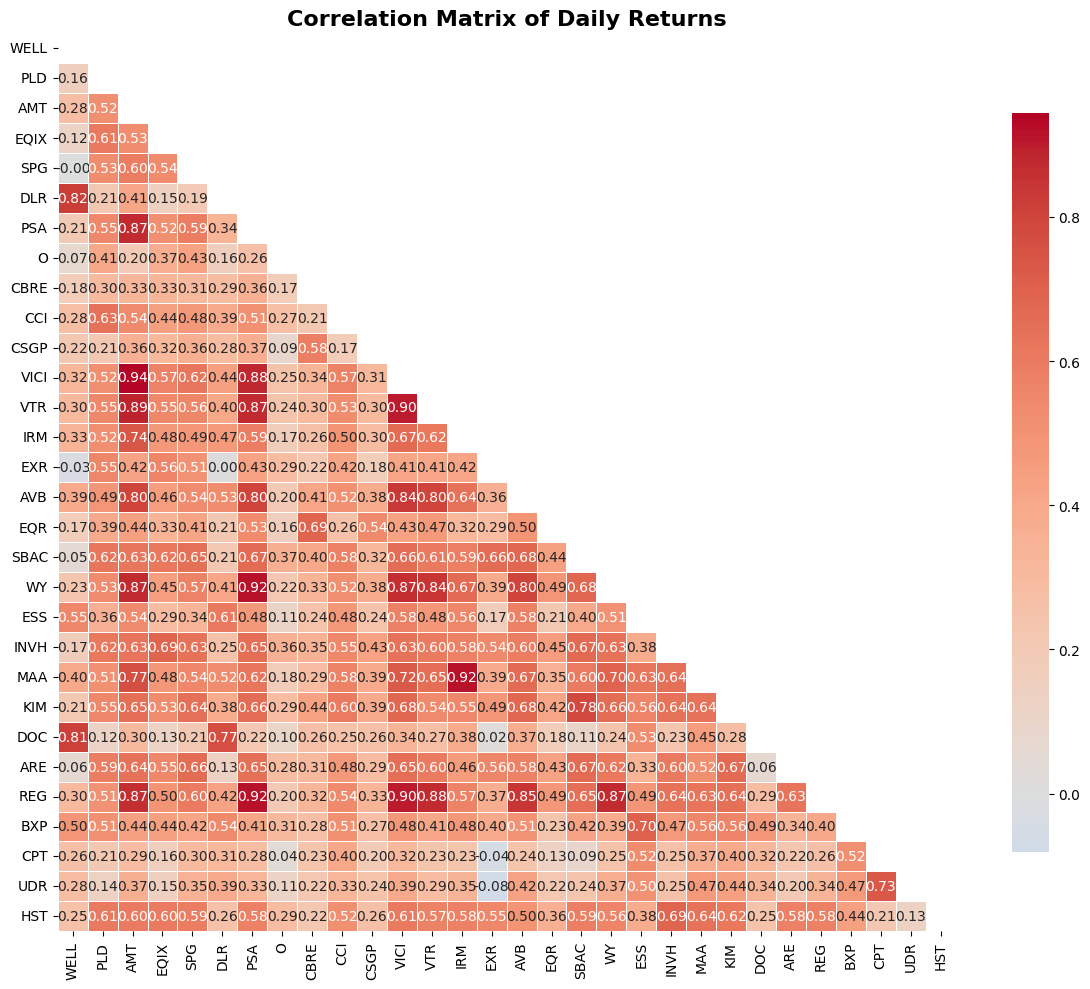


Correlation Statistics:
Mean correlation: 0.4396
Median correlation: 0.4325
Min correlation: -0.0810
Max correlation: 0.9447
Standard deviation: 0.1976


In [69]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Correlation Matrix of Daily Returns', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary statistics of correlations
corr_values = corr_matrix.values
upper_triangle = corr_values[np.triu_indices_from(corr_values, k=1)]

print(f"\nCorrelation Statistics:")
print(f"Mean correlation: {upper_triangle.mean():.4f}")
print(f"Median correlation: {np.median(upper_triangle):.4f}")
print(f"Min correlation: {upper_triangle.min():.4f}")
print(f"Max correlation: {upper_triangle.max():.4f}")
print(f"Standard deviation: {upper_triangle.std():.4f}")


#PCA RESULTS

In [70]:
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(daily_returns)

pca = PCA()
pca_result = pca.fit_transform(returns_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("PCA Results:")
print("=" * 30)
print(f"Number of components: {len(explained_variance_ratio)}")
print(f"\nExplained variance by component:")
for i, (var_ratio, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio)):
    print(f"Component {i+1:2d}: {var_ratio:.4f} ({var_ratio*100:.2f}%) | Cumulative: {cum_var:.4f} ({cum_var*100:.2f}%)")
    if i >= 9:  # Show first 10 components
        print("...")
        break


PCA Results:
Number of components: 30

Explained variance by component:
Component  1: 0.4834 (48.34%) | Cumulative: 0.4834 (48.34%)
Component  2: 0.1077 (10.77%) | Cumulative: 0.5910 (59.10%)
Component  3: 0.0577 (5.77%) | Cumulative: 0.6487 (64.87%)
Component  4: 0.0551 (5.51%) | Cumulative: 0.7038 (70.38%)
Component  5: 0.0475 (4.75%) | Cumulative: 0.7512 (75.12%)
Component  6: 0.0306 (3.06%) | Cumulative: 0.7819 (78.19%)
Component  7: 0.0244 (2.44%) | Cumulative: 0.8063 (80.63%)
Component  8: 0.0218 (2.18%) | Cumulative: 0.8281 (82.81%)
Component  9: 0.0197 (1.97%) | Cumulative: 0.8477 (84.77%)
Component 10: 0.0181 (1.81%) | Cumulative: 0.8658 (86.58%)
...


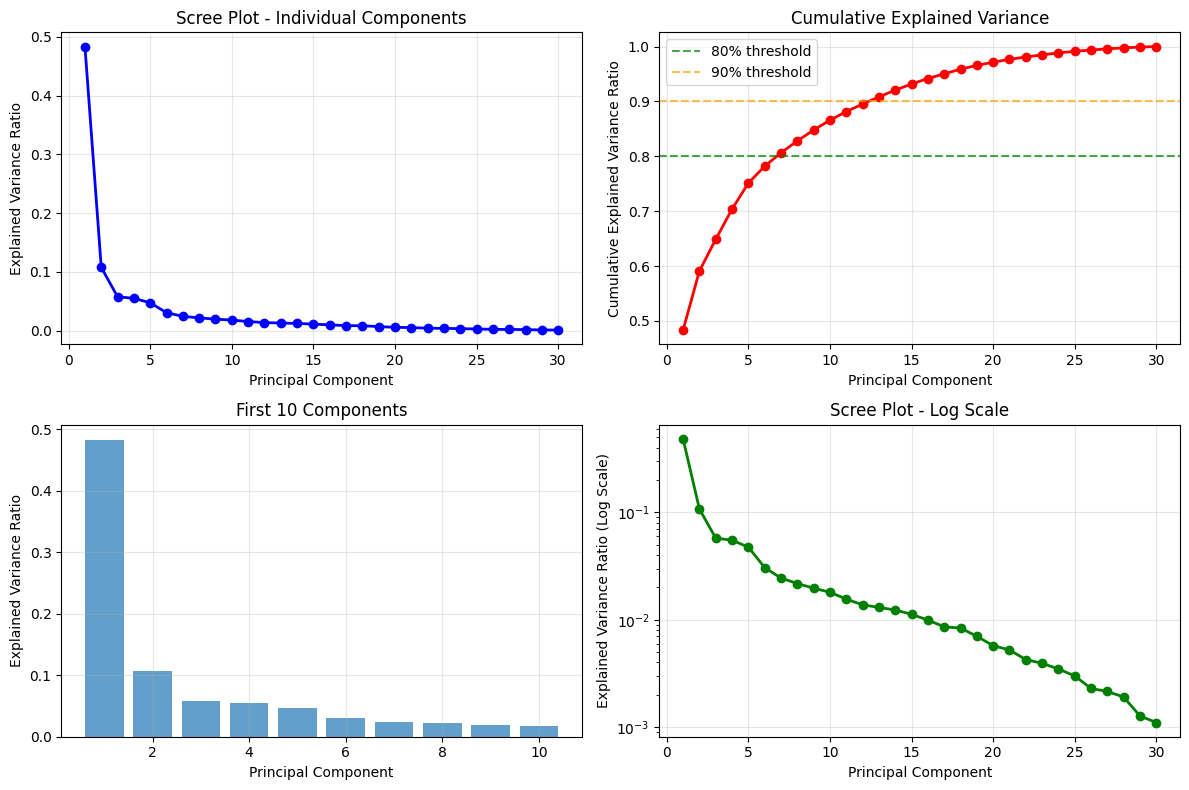


Key Insights:
First component explains 48.34% of variance
First 3 components explain 64.87% of variance
First 5 components explain 75.12% of variance
Components needed for 80% variance: 7
Components needed for 90% variance: 13


In [71]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Individual Components')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.8, color='green', linestyle='--', alpha=0.7, label='80% threshold')
plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% threshold')
plt.legend()

plt.subplot(2, 2, 3)
n_components_show = min(10, len(explained_variance_ratio))
plt.bar(range(1, n_components_show + 1), explained_variance_ratio[:n_components_show], alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(f'First {n_components_show} Components')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.semilogy(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'go-', linewidth=2, markersize=6)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (Log Scale)')
plt.title('Scree Plot - Log Scale')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nKey Insights:")
print(f"First component explains {explained_variance_ratio[0]*100:.2f}% of variance")
print(f"First 3 components explain {cumulative_variance_ratio[2]*100:.2f}% of variance")
print(f"First 5 components explain {cumulative_variance_ratio[4]*100:.2f}% of variance")
print(f"Components needed for 80% variance: {np.where(cumulative_variance_ratio >= 0.8)[0][0] + 1}")
print(f"Components needed for 90% variance: {np.where(cumulative_variance_ratio >= 0.9)[0][0] + 1}")


#Principal Components

In [72]:
print("Principal Component Loadings (First 5 Components):")
print("=" * 60)

components_df = pd.DataFrame(
    pca.components_[:5].T,
    columns=[f'PC{i+1}' for i in range(5)],
    index=daily_returns.columns
)

print(components_df.round(4))

print("\nTop 5 stocks by absolute loading for each component:")
print("=" * 60)

for i in range(5):
    pc_name = f'PC{i+1}'
    top_stocks = components_df[pc_name].abs().nlargest(5)
    print(f"\n{pc_name}:")
    for stock, loading in top_stocks.items():
        print(f"  {stock}: {loading:.4f}")


Principal Component Loadings (First 5 Components):
         PC1     PC2     PC3     PC4     PC5
WELL  0.1027  0.4086  0.0383 -0.0123 -0.3585
PLD   0.1828 -0.1459  0.2531 -0.0136 -0.0763
AMT   0.2324 -0.0229 -0.2234 -0.1468  0.0205
EQIX  0.1752 -0.1713  0.2061  0.0526 -0.0904
SPG   0.1909 -0.1411  0.1249  0.0722  0.1506
DLR   0.1388  0.3841  0.0012 -0.0034 -0.2555
PSA   0.2276 -0.0810 -0.2451 -0.0693  0.0525
O     0.0927 -0.1062  0.3260  0.0741 -0.0939
CBRE  0.1238  0.0185 -0.0854  0.5785 -0.0360
CCI   0.1815  0.0089  0.2197 -0.1279  0.0747
CSGP  0.1227  0.0390 -0.1192  0.5052 -0.0362
VICI  0.2366 -0.0111 -0.1912 -0.1501  0.0277
VTR   0.2220 -0.0442 -0.2362 -0.1488 -0.0458
IRM   0.2017  0.0498  0.0001 -0.1499 -0.1024
EXR   0.1441 -0.2684  0.2461 -0.0098 -0.1923
AVB   0.2249  0.0418 -0.2087 -0.0378 -0.0294
EQR   0.1465 -0.0635 -0.1975  0.4644 -0.0552
SBAC  0.2075 -0.1923  0.0771  0.0274 -0.0161
WY    0.2266 -0.0466 -0.2614 -0.0977  0.0420
ESS   0.1729  0.2714  0.0889 -0.0973  0.0820
INVH

#SVD Results

In [73]:
U, s, Vt = np.linalg.svd(returns_scaled, full_matrices=False)

print("SVD Results:")
print("=" * 30)
print(f"U shape: {U.shape}")
print(f"Singular values shape: {s.shape}")
print(f"Vt shape: {Vt.shape}")

squared_singular_values = s ** 2
explained_variance_svd = squared_singular_values / np.sum(squared_singular_values)
cumulative_variance_svd = np.cumsum(explained_variance_svd)

print(f"\nExplained variance by singular value:")
for i, (var_ratio, cum_var) in enumerate(zip(explained_variance_svd, cumulative_variance_svd)):
    print(f"Singular Value {i+1:2d}: {var_ratio:.4f} ({var_ratio*100:.2f}%) | Cumulative: {cum_var:.4f} ({cum_var*100:.2f}%)")
    if i >= 9:
        print("...")
        break


SVD Results:
U shape: (122, 30)
Singular values shape: (30,)
Vt shape: (30, 30)

Explained variance by singular value:
Singular Value  1: 0.4834 (48.34%) | Cumulative: 0.4834 (48.34%)
Singular Value  2: 0.1077 (10.77%) | Cumulative: 0.5910 (59.10%)
Singular Value  3: 0.0577 (5.77%) | Cumulative: 0.6487 (64.87%)
Singular Value  4: 0.0551 (5.51%) | Cumulative: 0.7038 (70.38%)
Singular Value  5: 0.0475 (4.75%) | Cumulative: 0.7512 (75.12%)
Singular Value  6: 0.0306 (3.06%) | Cumulative: 0.7819 (78.19%)
Singular Value  7: 0.0244 (2.44%) | Cumulative: 0.8063 (80.63%)
Singular Value  8: 0.0218 (2.18%) | Cumulative: 0.8281 (82.81%)
Singular Value  9: 0.0197 (1.97%) | Cumulative: 0.8477 (84.77%)
Singular Value 10: 0.0181 (1.81%) | Cumulative: 0.8658 (86.58%)
...


#Comparison of PCA and SVD Results



Comparison of PCA and SVD Results:
PCA explained variance (first 5): [0.48335974 0.10765762 0.05765635 0.05509149 0.04746892]
SVD explained variance (first 5): [0.48335974 0.10765762 0.05765635 0.05509149 0.04746892]
Difference (PCA - SVD): [ 5.55111512e-17 -1.52655666e-16 -1.31838984e-16  9.02056208e-17
 -2.77555756e-17]

PCA and SVD results are approximately equal: True


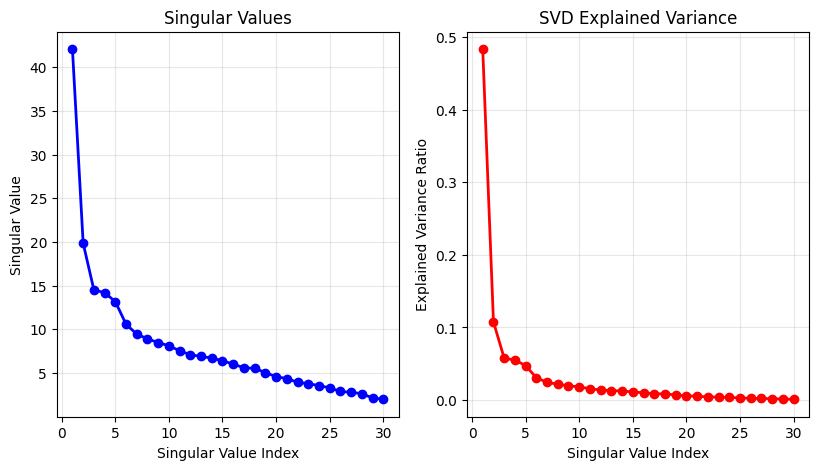

In [74]:
print("Comparison of PCA and SVD Results:")
print("=" * 50)
print(f"PCA explained variance (first 5): {explained_variance_ratio[:5]}")
print(f"SVD explained variance (first 5): {explained_variance_svd[:5]}")
print(f"Difference (PCA - SVD): {explained_variance_ratio[:5] - explained_variance_svd[:5]}")

are_equal = np.allclose(explained_variance_ratio, explained_variance_svd, atol=1e-10)
print(f"\nPCA and SVD results are approximately equal: {are_equal}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(s) + 1), s, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(explained_variance_svd) + 1), explained_variance_svd, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Singular Value Index')
plt.ylabel('Explained Variance Ratio')
plt.title('SVD Explained Variance')
plt.grid(True, alpha=0.3)

In [75]:
print("SVD V Matrix (Right Singular Vectors) - First 5 Components:")
print("=" * 70)

V_df = pd.DataFrame(
    Vt[:5].T,
    columns=[f'SV{i+1}' for i in range(5)],
    index=daily_returns.columns
)

print(V_df.round(4))

print("\nComparison of PCA Components and SVD V Matrix:")
print("=" * 60)
print("First component comparison (PCA vs SVD):")
comparison_df = pd.DataFrame({
    'PCA_PC1': components_df['PC1'],
    'SVD_SV1': V_df['SV1'],
    'Difference': components_df['PC1'] - V_df['SV1']
})
print(comparison_df.round(6))

pc1_svd1_diff = np.abs(components_df['PC1'] - V_df['SV1'])
pc1_svd1_diff_neg = np.abs(components_df['PC1'] + V_df['SV1'])
are_similar = np.allclose(pc1_svd1_diff, 0, atol=1e-10) or np.allclose(pc1_svd1_diff_neg, 0, atol=1e-10)
print(f"\nPCA PC1 and SVD SV1 are approximately equal (allowing sign flip): {are_similar}")


SVD V Matrix (Right Singular Vectors) - First 5 Components:
         SV1     SV2     SV3     SV4     SV5
WELL -0.1027 -0.4086  0.0383 -0.0123  0.3585
PLD  -0.1828  0.1459  0.2531 -0.0136  0.0763
AMT  -0.2324  0.0229 -0.2234 -0.1468 -0.0205
EQIX -0.1752  0.1713  0.2061  0.0526  0.0904
SPG  -0.1909  0.1411  0.1249  0.0722 -0.1506
DLR  -0.1388 -0.3841  0.0012 -0.0034  0.2555
PSA  -0.2276  0.0810 -0.2451 -0.0693 -0.0525
O    -0.0927  0.1062  0.3260  0.0741  0.0939
CBRE -0.1238 -0.0185 -0.0854  0.5785  0.0360
CCI  -0.1815 -0.0089  0.2197 -0.1279 -0.0747
CSGP -0.1227 -0.0390 -0.1192  0.5052  0.0362
VICI -0.2366  0.0111 -0.1912 -0.1501 -0.0277
VTR  -0.2220  0.0442 -0.2362 -0.1488  0.0458
IRM  -0.2017 -0.0498  0.0001 -0.1499  0.1024
EXR  -0.1441  0.2684  0.2461 -0.0098  0.1923
AVB  -0.2249 -0.0418 -0.2087 -0.0378  0.0294
EQR  -0.1465  0.0635 -0.1975  0.4644  0.0552
SBAC -0.2075  0.1923  0.0771  0.0274  0.0161
WY   -0.2266  0.0466 -0.2614 -0.0977 -0.0420
ESS  -0.1729 -0.2714  0.0889 -0.0973 -0.

# Analysis Report on XLRE Holdings

This report summarizes the key findings from the analysis of daily returns for the top 30 holdings in the XLRE ETF over the past 6 months.

## 1. Data Overview

*   **Number of Holdings:** 30
*   **Time Period:** 122 trading days
*   **Date Range:** From 2025-04-11 to 2025-10-06

## 2. Covariance Matrix Summary

The covariance matrix quantifies the degree to which the returns of different holdings move together.

*   **Average Covariance:** 0.000088
*   **Minimum Covariance:** -0.000015
*   **Maximum Covariance:** 0.000362

A positive average covariance suggests that, on average, the holdings in this ETF tend to move in the same direction. The range of values indicates varying degrees of co-movement between different pairs of assets.

## 3. PCA Results (Principal Component Analysis)

PCA was performed on the standardized daily returns to identify the principal components that capture the most variance in the data.

| Component | Explained Variance (%) | Cumulative Variance (%) |
| :-------- | :--------------------- | :---------------------- |
| 1         | 48.34%                 | 48.34%                  |
| 2         | 10.77%                 | 59.10%                  |
| 3         | 5.77%                  | 64.87%                  |
| 4         | 5.51%                  | 70.38%                  |
| 5         | 4.75%                  | 75.12%                  |
| 6         | 3.06%                  | 78.19%                  |
| 7         | 2.44%                  | 80.63%                  |
| 8         | 2.18%                  | 82.81%                  |
| 9         | 1.97%                  | 84.77%                  |
| 10        | 1.81%                  | 86.58%                  |

The first principal component explains a significant portion (48.34%) of the total variance, suggesting a strong common factor influencing the returns of these REITs (likely a market or sector-specific factor). The cumulative variance shows that a large percentage of the total variance can be explained by a relatively small number of components.

## 4. SVD Results (Singular Value Decomposition)

SVD was performed on the scaled returns, providing singular values related to the variance in the data.

*   **Number of Singular Values:** 30
*   **Largest Singular Value:** 42.0606
*   **Smallest Singular Value:** 2.0083
*   **Condition Number:** 20.94 (The condition number indicates the sensitivity of the inverse of the matrix to errors. A smaller number is generally better for numerical stability.)

The explained variance derived from the singular values is approximately equal to the explained variance from PCA, as expected.

## 5. Key Findings

*   The **first 5 components** explain **75.1%** of the total variance in daily returns.
*   The **first 10 components** explain **86.6%** of the total variance.
*   **Dimensionality Reduction Potential:** High, as a substantial amount of the total variance is captured by a small number of components. This suggests that the complexity of the 30 individual holdings' returns can be largely represented by a few underlying factors.
*   **Components needed for 80% variance:** 7
*   **Components needed for 90% variance:** 13

## 6. Volatility Analysis (Top 10 Most Volatile Holdings)

The volatility (measured by the standard deviation of daily returns) varies across the holdings. The top 10 most volatile holdings are:

1.  PLD: 0.019021
2.  O: 0.018821
3.  EQIX: 0.018290
4.  HST: 0.016831
5.  CSGP: 0.016680
6.  EQR: 0.016563
7.  SPG: 0.016265
8.  DOC: 0.016007
9.  IRM: 0.015962
10. EXR: 0.015242

This report provides a summary of the initial data characteristics, the relationships between asset returns, and insights into the underlying factors driving the variance in the XLRE ETF holdings. Further analysis could involve interpreting the loadings of the principal components to understand the nature of these factors or using these results for portfolio construction and risk management.